<a href="https://colab.research.google.com/github/WilliamSawran/ABC/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>

**<h1>Naive Bayes Learning and Learning the KNN Classifier</h1>**

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h2>Task 1 Programming and Evaluation on a Small Dataset : </h2>**

<p>Given a university’s football game data for the last two seasons, please construct Naïve Bayes classification models to predict game results on games, and evaluate the model performance.</p>

* Data
>Each data object (or called instance) is a game. <br> We have three attributes:  <br> 
>>1. “Is Home/Away?”, a 2-value attribute (“Home”, “Away”),
>>2. “Is Opponent in AP Top 25 at Preseason?”, a 2-value attribute (“In”, “Out”),
>>3. “Media”, a 5-value attribute (“1-NBC”, “2- ESPN”, “3-FOX”, “4-ABC”, “5-CBS”). The label “Win/Lose” is binary (“Win”, “Lose”).

* Training set
>24 games. Please use game ID 1-24 to construct classification models. 

* Testing set
>12 games. Please use your classification models to predict labels of game ID 25-36 and evaluate the performance of the classification models. 

* Predictive labels
>Suppose “Win” is the positive label and “Lose” is the negative label. Keep it in mind when you use Precision and Recall to evaluate the models.

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q1</h3>**

<p>Programming (you can implement from scratch, use open-sourced code, or use machine learning platforms): Use Naïve Bayes and KNN to predict labels of instances in the testing set (12 games) based on the training set (24 games). Calculate Accuracy, Precision, Recall, and F1 score on the testing result. 

This posting discusses the four measurements: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/</p>

</body>
</html>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [ ]:
#@title Import libaries
#importing library
import io
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd



In [ ]:
#@title Read train and test data sets
# read train datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

#check the train dataset
train.head()

,ID,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label
0,1,9/5/2015,Texas,Home,Out,1-NBC,Win
1,2,9/12/2015,Virginia,Away,Out,4-ABC,Win
2,3,9/19/2015,GeorgiaTech,Home,In,1-NBC,Win
3,4,9/26/2015,UMass,Home,Out,1-NBC,Win
4,5,10/3/2015,Clemson,Away,In,4-ABC,Lose


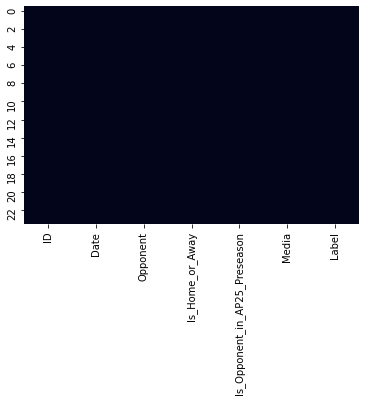

In [ ]:
#@title Check for missing values
#now, we begin with a pairplot to check for missing values
sns.heatmap(train.isnull(),cbar=False)

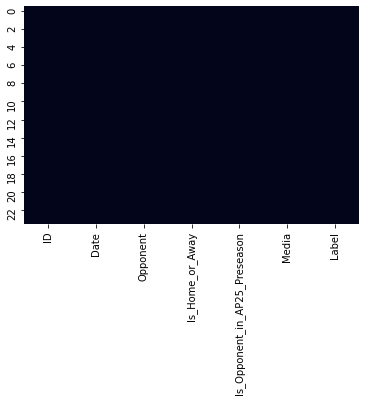

In [ ]:
#@title Check for values equal to zero
#now, we begin with a pairplot to check for missing values
sns.heatmap(train.eq(0),cbar=False)

In [ ]:
#@title Clean and pre-process data set

# To use the Is_Home_or_Away data, we change the 
# type of the data from categorical to numerical
#train.loc[train['Is_Home_or_Away']=='Home','Is_Home_or_Away']=1
#train.loc[train['Is_Home_or_Away']=='Away','Is_Home_or_Away']=2
#test.loc[test['Is_Home_or_Away']=='Home','Is_Home_or_Away']=1
#test.loc[test['Is_Home_or_Away']=='Away','Is_Home_or_Away']=2

# To use the Is_Opponent_in_AP25_Preseason data, we change the 
# type of the data from categorical to numerical
#train.loc[train['Is_Opponent_in_AP25_Preseason']=='In','Is_Opponent_in_AP25_Preseason']=1
#train.loc[train['Is_Opponent_in_AP25_Preseason']=='Out','Is_Opponent_in_AP25_Preseason']=2
#test.loc[test['Is_Opponent_in_AP25_Preseason']=='In','Is_Opponent_in_AP25_Preseason']=1
#test.loc[test['Is_Opponent_in_AP25_Preseason']=='Out','Is_Opponent_in_AP25_Preseason']=2

# To use the Media data, we also change the type of 
# the data from categorical to numerical
#train.loc[train['Media']=='1-NBC','Media']=1
#train.loc[train['Media']=='2-ESPN','Media']=2
#train.loc[train['Media']=='3-FOX','Media']=3
#train.loc[train['Media']=='4-ABC','Media']=4
#train.loc[train['Media']=='5-CBS','Media']=5
#test.loc[test['Media']=='1-NBC','Media']=1
#test.loc[test['Media']=='2-ESPN','Media']=2
#test.loc[test['Media']=='3-FOX','Media']=3
#test.loc[test['Media']=='4-ABC','Media']=4
#test.loc[test['Media']=='5-CBS','Media']=5

list_of_Opponents_in_test_dataset = test['Opponent']

# To use the Label data, we change the 
# type of the data from categorical to numerical
train=train.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))
test=test.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))

#test.loc[test['Label']=='Win','Label']=1
#test.loc[test['Label']=='Lose','Label']=0

# To use the Opponent data, we change the 
# type of the data from categorical to numerical
#

#Opponents_list = train['Opponent'].append(test['Opponent']).sort_values().drop_duplicates().tolist()
#Opponents_dictionary = {Opponents_list[i]:i for i in range(len(Opponents_list))}
#train['Opponent'] = train['Opponent'].replace(Opponents_dictionary)
#test['Opponent'] = test['Opponent'].replace(Opponents_dictionary)


print(train.head())
print(test.head())

   ID  Date  Opponent  ...  Is_Opponent_in_AP25_Preseason  Media  Label
0   0     0         0  ...                              0      0      0
1   1     1         1  ...                              0      1      0
2   2     2         2  ...                              1      0      0
3   3     3         3  ...                              0      0      0
4   4     4         4  ...                              1      1      1

[5 rows x 7 columns]
   ID  Date  Opponent  ...  Is_Opponent_in_AP25_Preseason  Media  Label
0   0     0         0  ...                              0      0      0
1   1     1         1  ...                              1      0      1
2   2     2         2  ...                              0      1      0
3   3     3         3  ...                              0      2      0
4   4     4         4  ...                              0      0      0

[5 rows x 7 columns]


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
X_train = train.iloc[:,3:6]
Y_train = train.iloc[:,6]
X_test = test.iloc[:,3:6]
Y_test = test.iloc[:,6]

from sklearn.utils.multiclass import type_of_target
type_of_target(Y_train)


'binary'

In [ ]:
import math
math.sqrt(len(Y_train))

4.898979485566356

In [ ]:
# Define and initialize the model
KNN_classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
# Fit model
KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
predicted = KNN_classifier.predict(X_test)
Y_predict = pd.DataFrame(predicted, index = list_of_Opponents_in_test_dataset, columns=['Label'])
Y_predict['Label'] = Y_predict['Label'].replace({0:"Win",1:"Lose"})
print("KNN Classifier Predictions")
Y_predict

KNN Classifier Predictions


,Label
Opponent,
Temple,Win
Georgia,Win
BostonCollege,Win
MichiganState,Win
MiamiOhio,Win
NorthCarolina,Lose
USC,Win
NorthCarolinaState,Win
WakeForest,Win


In [ ]:
my_confusion_matrix = confusion_matrix(Y_test, predicted)
my_confusion_matrix = pd.DataFrame({'Predicted Class=Win': my_confusion_matrix[:, 0], 'Predicted Class=Lose': my_confusion_matrix[:, 1]},index=["Actual Class=Win", "Actual Class=Lose"])
print("Confusion Matrix:\n")
my_confusion_matrix

Confusion Matrix:



,Predicted Class=Win,Predicted Class=Lose
Actual Class=Win,8,1
Actual Class=Lose,1,2


In [ ]:
print("accuracy = {accuracy:.2f}".format(accuracy = accuracy_score(Y_test, predicted)))
print("precision = {precision:.2f}".format(precision = precision_score(Y_test, predicted))) 
print("recall = {recall:.2f}".format(recall = recall_score(Y_test, predicted))) 
print("f1 = {f1:.2f}".format(f1 = f1_score(Y_test, predicted))) 


accuracy = 0.83
precision = 0.67
recall = 0.67
f1 = 0.67


In [ ]:
from sklearn.naive_bayes import GaussianNB
Gaussian_Naive_Bayes_classifier = GaussianNB()
Gaussian_Naive_Bayes_classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
expected = Y_test
predicted = Gaussian_Naive_Bayes_classifier.predict(X_test)

Y_predict = pd.DataFrame(predicted, index = list_of_Opponents_in_test_dataset, columns=['Label'])
Y_predict['Label'] = Y_predict['Label'].replace({0:"Win",1:"Lose"})
print("Naive Bayes Predictions")
Y_predict

Naive Bayes Predictions


,Label
Opponent,
Temple,Win
Georgia,Lose
BostonCollege,Win
MichiganState,Lose
MiamiOhio,Win
NorthCarolina,Lose
USC,Lose
NorthCarolinaState,Win
WakeForest,Win


In [ ]:
my_confusion_matrix = confusion_matrix(expected, predicted)
my_confusion_matrix = pd.DataFrame({'Predicted Class=Win': my_confusion_matrix[:, 0], 'Predicted Class=Lose': my_confusion_matrix[:, 1]},index=["Actual Class=Win", "Actual Class=Lose"])
print("Confusion Matrix:\n")
my_confusion_matrix

Confusion Matrix:



,Predicted Class=Win,Predicted Class=Lose
Actual Class=Win,6,3
Actual Class=Lose,0,3


In [ ]:
print("accuracy = {accuracy:.2f}".format(accuracy = accuracy_score(expected, predicted)))
print("precision = {precision:.2f}".format(precision = precision_score(expected, predicted))) 
print("recall = {recall:.2f}".format(recall = recall_score(expected, predicted))) 
print("f1 = {f1:.2f}".format(f1 = f1_score(expected, predicted))) 

accuracy = 0.75
precision = 0.50
recall = 1.00
f1 = 0.67


<!DOCTYPE html>
<html>
<body>

**<h2>Task 2 Programming and Evaluation on a Large Dataset (Titanic): </h2>**

</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>Q1</h3>**

<p>Test your naïve Bayesian classification on the Titanic dataset. Report the average Accuracy, Precision, Recall, and F1 score of your five-fold cross validation. The five-folds of the Titanic data are split randomly. What do you observe and learn by applying Bayesian learning to small datasets and larger datasets? </p>

</body>
</html>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_test.csv to titanic_test (2).csv
Saving titanic_train.csv to titanic_train (2).csv


In [ ]:
#@title Read train and test data sets
# read train datasets
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
combine = [train, test]

#check the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#@title Clean and pre-process data set
#According to the pairplot, the Age and Cabin column have lots of missing values. 
#We get the median of data for the Age and Fare columns, so that we can 
# do exploratory analysis with the Age and Fare data.

# Fill missing values
train['Fare'] = train['Fare'].fillna(train['Fare'].dropna().median())
train['Age'] = train['Age'].fillna(train['Age'].dropna().median())

# We replace the missing values in the Embarked columnn with the label 'S'
train['Embarked']=train['Embarked'].fillna('S')

# To use the sex data, we change the type of the data from categorical to numerical
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

# To use the Embarked data, we also change the type of the data from categorical to numerical
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2

# Continue to clean and pre-process data set
variable_name = "" #@param {type:"string"}
#The individual names, the cabin and the ticket are probably less informative
#columns for classifying whether or not the individual survived. 
# Thus, we drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
train = train.drop(drop_elements, axis=1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


My Selected Features

In a previous homework, I used two feature selection algorithms, the Univariate feature selection and the Variance Threshold feature selection, to identify and select features for the prediction model.

* The Univariate feature selection approach selected Pclass, Sex, Age, Fare, and Embarked. 

* The Variance Threshold feature selection approach selected Pclass, Age, SibSp, Parch, and Fare.

Therefore, my selected features will be Pclass, Sex, SibSp, Parch, Fare, Embarked, Age.

In [ ]:
from sklearn.model_selection import train_test_split

target = train['Survived'].values
data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
features = train[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

Naive_Bayes_classifier_for_Titanic_dataset = GaussianNB()
Naive_Bayes_classifier_for_Titanic_dataset.fit(X_train,y_train)


expected = y_test
predicted = Naive_Bayes_classifier_for_Titanic_dataset.predict(X_test)

Y_predict = pd.DataFrame(predicted, columns=['Survived?'])
Y_predict['Survived?'] = Y_predict['Survived?'].replace({0:"Survived",1:"Did not survive"})
print("Naive Bayes Predictions for Titanic Dataset")
Y_predict

Naive Bayes Predictions for Titanic Dataset


,Survived?
0,Survived
1,Survived
2,Survived
3,Did not survive
4,Did not survive
...,...
263,Survived
264,Survived
265,Survived
266,Survived


In [ ]:
#@title Apply the five-fold cross validation of the Naive Bayes algorithm
from sklearn.model_selection import (cross_val_score, KFold, StratifiedKFold)
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

NaiveBayesClassifierTitanicCrossValidation = Naive_Bayes_classifier_for_Titanic_dataset
metrics = ['accuracy', 'precision', 'recall','f1']
data = {}
for metric in metrics:
  score = cross_val_score(NaiveBayesClassifierTitanicCrossValidation, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
  data[metric]=score
scores = pd.DataFrame(data)
scores

,accuracy,precision,recall,f1
0,0.856000,0.856000,0.856000,0.856000
1,0.792000,0.792000,0.792000,0.792000
2,0.752000,0.752000,0.752000,0.752000
3,0.766129,0.766129,0.766129,0.766129
4,0.766129,0.766129,0.766129,0.766129


<!DOCTYPE html>
<html>
<body>

**<h3>Q2</h3>**

Q2: Implement KNN classification from scratch, and evaluate how K impacts the overall accuracy of kNN on the dataset. Plot the accuracies of kNN over k,  and identify the best K. You can read sample code and try to implement by yourself. Below are some sample implementations from Github for your fast references: 
1. https://github.com/sagarmk/Knn-from-scratch
2. https://github.com/senavs/knn-from-scratch
3. https://github.com/mavaladezt/kNN-from-Scratch
4. https://github.com/tugot17/KNN-Algorithm-From-Scratch
5. https://github.com/varmichelle/KNN

</body>
</html>

In [ ]:
def knn_distances(xTrain,xTest,k):
    """
    Finds the k nearest neighbors of xTest in xTrain.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    dists = distances between all xTrain and all XTest points. Size of n x m
    indices = k x m matrix with the indices of the yTrain labels that represent the point
    """
    #the following formula calculates the Euclidean distances.
    import numpy as np
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
    #because of float precision, some small numbers can become negatives. Need to be replace with 0.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k,:], distances[0:k,:]


def knn_predictions(xTrain,yTrain,xTest,k=3):
    """
    Uses xTrain and yTrain to predict xTest.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    yTrain = n x 1 array. n=rows with label value
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    predictions = predicted labels, ie preds(i) is the predicted label of xTest(i,:)
    """
    import numpy as np
    indices, distances = knn_distances(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

def knn_accuracy(yTest,predictions):
    """
    Evaluates accuracy of the knn_predictions. Returns a value between 0 and 100%.
    Input:
    yTest = array of shape (n,) where n = rows in test set
    preds = array of shape (n,) where n = rows in test set
    Output:
    accuracy = % of correct answers in the prediction
    """
    import numpy as np
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)



In [ ]:
#The knn_predictions function will call knn_distances and bring back prediction based
# on the distance and the size of k.
predictions = knn_predictions(X_train,y_train, X_test,3)
print('Size of Predictions Array:\n', predictions.shape)
#print('\nPredictions Array:\n',knn_predictions(xTrain,yTrain,xTest,3))



Size of Predictions Array:
 (268,)


In [ ]:
#Will call knn_accuracy, which was imported from knn.py file
print('Accuracy:',knn_accuracy(predictions,y_test),'%')



Accuracy: 69.4 %


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#will first check which is the best k
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    #neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    #yhat=neigh.predict(xTest)
    yhat = knn_predictions(X_train,y_train, X_test,n)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1)

The best accuracy was: 71.64 % with k= 6


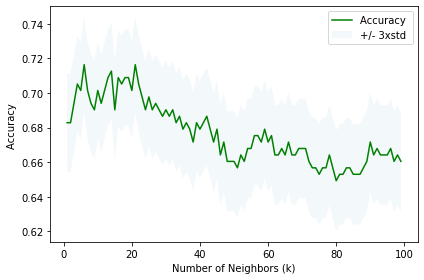

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html>
<body>

**<h3>Q3</h3>**

Q3: According to your algorithm analysis, which machine learning model performs better, Naïve Baysian or KNN on the Titanic dataset?

KNN had an accuracy of 71.64% with the best k while Naive Baysian had an accuracy of 79.04%.  Looking at accuracy, Naive Baysian appears to perform classification better than KNN when both are applied to a larger dataset like the Titanic dataset.

</body>
</html>